<a href="https://colab.research.google.com/github/SofiaNikolaeva-adey-201/OPDA-practiki/blob/02.04.new_new/pract_02_04_var_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Вариант 1.**

Вариант 1. неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах России. Highest-grossing Russian films (https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films)

In [1]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1] # 0 тк это первая талица на странице, а их несколько

In [2]:
df.head()

,Rank,Title,Gross,Year,Genre,Details,Director
0,1,Сталинград Stalingrad,"$68,075,573",2013,War,A World War II film about Battle of Stalingrad,Fyodor Bondarchuk
1,2,Движение Вверх Going Vertical,"$66,000,000",2017,Sports drama,About 1972 Olympic Men's Basketball Final,Anton Megerdichev
2,3,Ирония судьбы. Продолжение Irony of Fate: The ...,"$55,639,114",2007,Romantic comedy,"A Christmas film, the sequel to a 1976 film of...",Timur Bekmambetov
3,4,Холоп Serf,"$47,500,000",2019,Comedy,NaN,Klim Shipenko
4,5,Дневной дозор Day Watch,"$42,918,532",2006,Fantasy,Based on urban fantasy book series Dozory by S...,Timur Bekmambetov


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     object
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [4]:
df['Gross']=df['Gross'].str.replace(r"$","").str.replace(r",","")

In [5]:
df.head()

,Rank,Title,Gross,Year,Genre,Details,Director
0,1,Сталинград Stalingrad,68075573,2013,War,A World War II film about Battle of Stalingrad,Fyodor Bondarchuk
1,2,Движение Вверх Going Vertical,66000000,2017,Sports drama,About 1972 Olympic Men's Basketball Final,Anton Megerdichev
2,3,Ирония судьбы. Продолжение Irony of Fate: The ...,55639114,2007,Romantic comedy,"A Christmas film, the sequel to a 1976 film of...",Timur Bekmambetov
3,4,Холоп Serf,47500000,2019,Comedy,NaN,Klim Shipenko
4,5,Дневной дозор Day Watch,42918532,2006,Fantasy,Based on urban fantasy book series Dozory by S...,Timur Bekmambetov


In [6]:
df['Gross']=df['Gross'].astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     int64 
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.8+ KB


In [8]:
df['Gross'].head(5)

0    68075573
1    66000000
2    55639114
3    47500000
4    42918532
Name: Gross, dtype: int64

In [9]:
df['Year']=df['Year'].astype('int64')

In [10]:
df.drop(['Rank', 'Director', 'Details'],axis=1,inplace=True)

In [11]:
df

,Title,Gross,Year,Genre
0,Сталинград Stalingrad,68075573,2013,War
1,Движение Вверх Going Vertical,66000000,2017,Sports drama
2,Ирония судьбы. Продолжение Irony of Fate: The ...,55639114,2007,Romantic comedy
3,Холоп Serf,47500000,2019,Comedy
4,Дневной дозор Day Watch,42918532,2006,Fantasy
5,Вий Viy,39539416,2014,"Fantasy, Horror"
6,Адмиралъ Admiral,38135878,2008,"Biography, History"
7,Ёлки 3 Yolki 3,38067427,2013,Comedy
8,Ночной дозор Night Watch,33951015,2004,Fantasy
9,Три богатыря на дальних берегах Three Knights ...,31505876,2012,"Animation, Fantasy"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   30 non-null     object
 1   Gross   30 non-null     int64 
 2   Year    30 non-null     int64 
 3   Genre   30 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [13]:
df1=df[['Title','Gross']].sort_values(ascending=False,by='Gross')

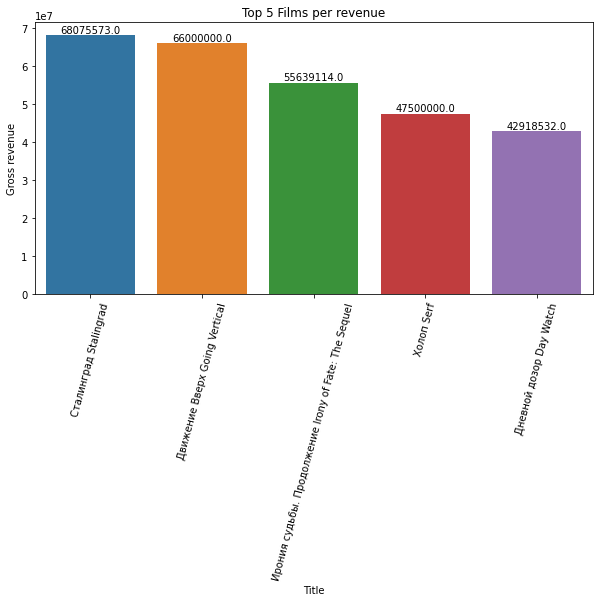

In [14]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(10,5))
#creating a bar plot
ax=sns.barplot(x='Title',y='Gross',data=df1.head(5))
#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Title'],rotation=75)
#setting the title
ax.set_title("Top 5 Films per revenue")
#setting the Y-axis labels
ax.set_ylabel("Gross revenue")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

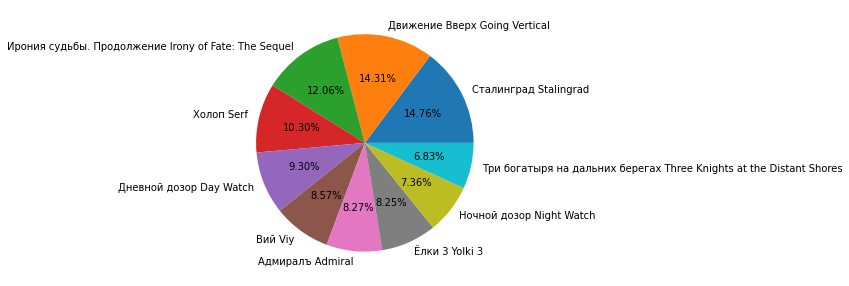

In [15]:
df1['Gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Title'],
figsize=(10,5), ylabel = '')
sns.set_palette("pastel")

In [16]:
df4=df[['Year','Gross', 'Title']].sort_values(by='Year').head(8)
df4

,Year,Gross,Title
8,2004,33951015,Ночной дозор Night Watch
27,2005,18500000,Турецкий гамбит The Turkish Gambit
16,2005,25555809,9 рота The 9th Company
4,2006,42918532,Дневной дозор Day Watch
23,2006,21015154,Волкодав Wolfhound
2,2007,55639114,Ирония судьбы. Продолжение Irony of Fate: The ...
6,2008,38135878,Адмиралъ Admiral
10,2008,30496695,Самый лучший фильм The Best Movie


Text(0, 0.5, 'Gross')

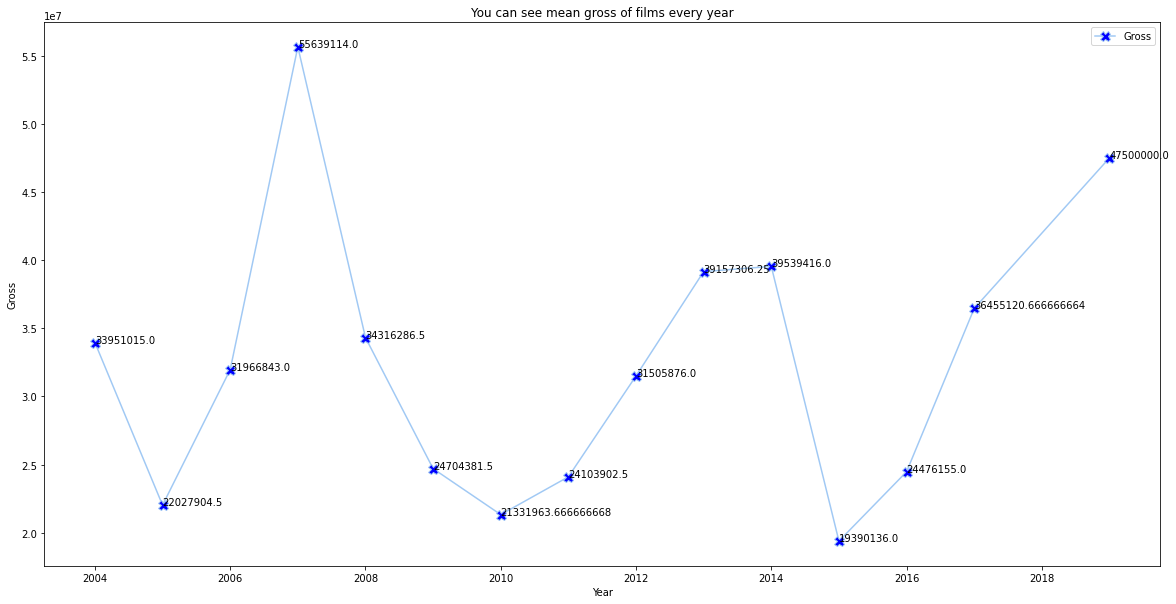

In [17]:
df4=df.groupby('Year')['Gross'].mean()
df5 = pd.DataFrame(df4)
#creating a line plot
df5.plot(kind='line',figsize=(20,10), marker = 'X', markersize = 10, markerfacecolor='blue')
sns.set_palette("husl")
for a,b in zip(df5.index, df5['Gross']): 
    plt.text(a, b, str(b))
plt.title('You can see mean gross of films every year')
plt.ylabel('Gross')

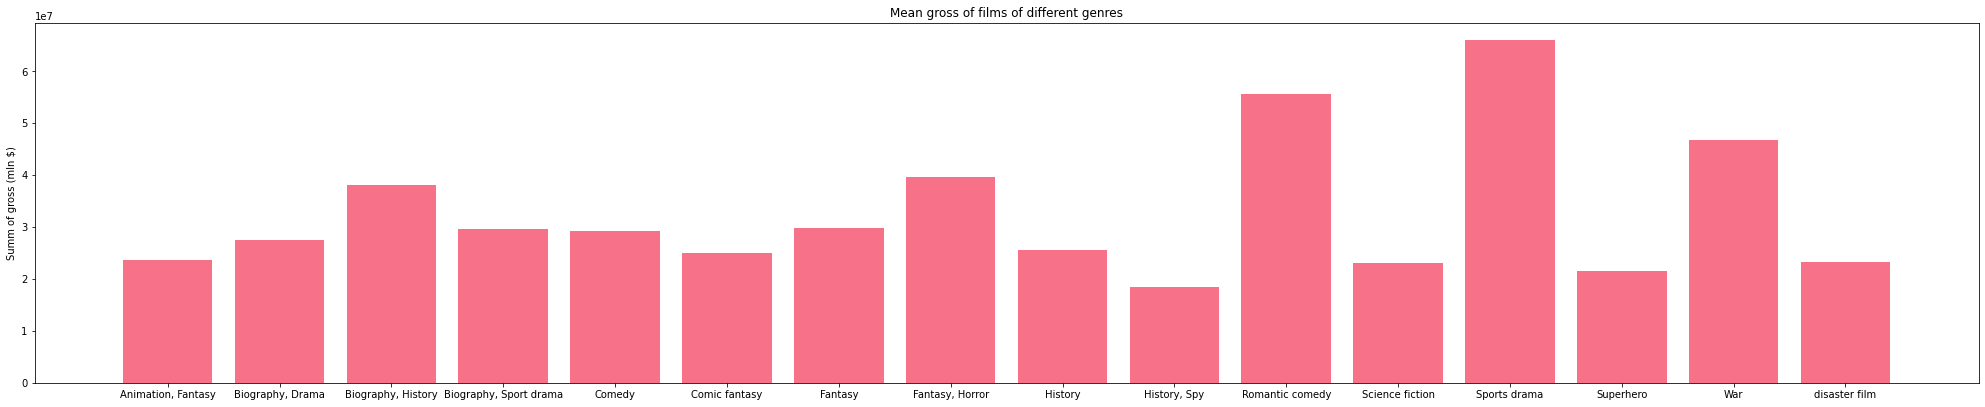

In [18]:
df2=df.groupby('Genre')['Gross'].mean()
df3 = pd.DataFrame(df2)
fig = plt.figure(figsize=(27,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(df3.index, df3['Gross'])
ax.set_title("Mean gross of films of different genres")
ax.set_ylabel('Summ of gross (mln $)')
plt.show()

Text(0.5, 1.0, 'Heatmap: years and gross')

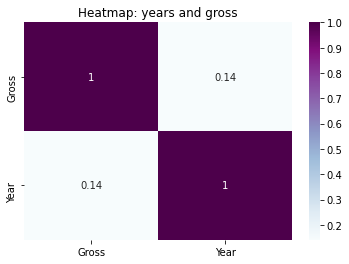

In [19]:
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu')
plt.title('Heatmap: years and gross')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numbers of films in each year')

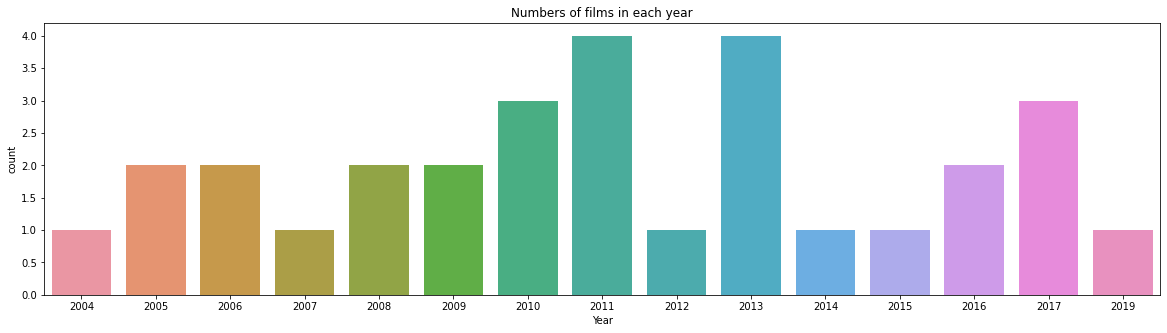

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df['Year'])
plt.title('Numbers of films in each year')

Text(0.5, 1.0, 'You can see summs of gross for each year')

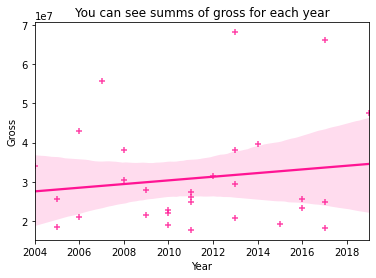

In [22]:
sns.regplot(x = 'Year', y = 'Gross', data = df, color="deeppink", marker="+")
plt.title('You can see summs of gross for each year')

# **Построение выводов на основе графиков**

1) Года, в которых были выпущены самые прибыльные фильмы: 2011, 2013, 2010

2) Самые прибыльные жанры: спортивная драмма, романтическая комедия и военный

3) Самый прибыльный фильм - "Сталинград"